In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

# load data

In [2]:
# Number of instances: 2535
# Number of attributes: 73 attributes  

df_data1 = pd.read_csv('ozone_eighthr.csv')
df_data1.replace(['?'],[-999], inplace =True)
df_data1.fillna(-999, inplace =True)
df_data1.iloc[:3]

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Orzone
0,01/01/1998,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0.0,0
1,01/02/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0.0,0
2,01/03/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0.0,0


In [3]:
df_data2 = pd.read_csv("ozone_onehr.csv")
df_data2.replace(['?'],[-999], inplace =True)
df_data2.fillna(-999, inplace =True)
df_data2.iloc[:3]

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Orzone
0,01/01/1998,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0.0,0
1,01/02/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0.0,0
2,01/03/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0.0,0


In [4]:
df_data1.groupby('Orzone')['Orzone'].count()

Orzone
0    2374
1     160
Name: Orzone, dtype: int64

In [5]:
df_data2.groupby('Orzone')['Orzone'].count()

Orzone
0    2463
1      73
Name: Orzone, dtype: int64

# Compare dataset split

test_size is 0.2 , auc is 0.8867791842475387
test_size is 0.3 , auc is 0.8921866618988021
test_size is 0.4 , auc is 0.8928206111750415
test_size is 0.5 , auc is 0.9120304620767727


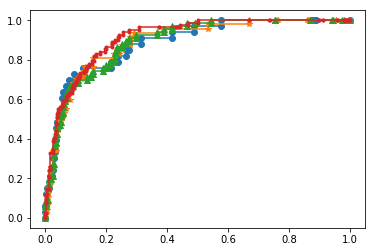

In [6]:
fpr = []
tpr = []
for size in [0.2, 0.3, 0.4, 0.5]:
    X_train, X_test, y_train, y_test = train_test_split(
                                df_data1.iloc[:, 1:-1].values, 
                                df_data1.iloc[:, -1].values, 
                                test_size=size, 
                                random_state=42)
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)
    y_new = model.predict_proba(X_test)[:, 1]   
    
    auc = metrics.roc_auc_score(y_test,y_new)
    print('test_size is %s' % size, ', auc is %s' % auc)
    
    fpr.append(metrics.roc_curve(y_test, y_new)[0])
    tpr.append(metrics.roc_curve(y_test, y_new)[1])

plt.plot(fpr[0], tpr[0], marker = 'o') 
plt.plot(fpr[1], tpr[1], marker = '*') 
plt.plot(fpr[2], tpr[2], marker = '^') 
plt.plot(fpr[3], tpr[3], marker = '.') 
plt.show()

As test_size goes up, auc goes up.

# Compare hyperparameters

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
                                df_data1.iloc[:, 1:-1].values, 
                                df_data1.iloc[:, -1].values, 
                                test_size=0.33, 
                                random_state=42)

max_depth is 3 , auc is 0.8940533672172808
max_depth is 4 , auc is 0.8918170266836086
max_depth is 5 , auc is 0.9054637865311308
max_depth is 6 , auc is 0.8953494282083863
max_depth is 7 , auc is 0.884015247776366
max_depth is 8 , auc is 0.8486277001270648


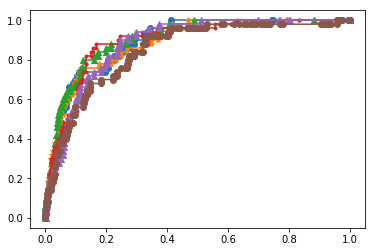

In [8]:
fpr = []
tpr = []

for item in [3,4,5,6,7,8]:
    model = GradientBoostingClassifier(max_depth = item)
    model.fit(X_train, y_train)
    y_new = model.predict_proba(X_test)[:, 1]   
    
    auc = metrics.roc_auc_score(y_test,y_new)
    print('max_depth is %s' % item, ', auc is %s' % auc)
    
    fpr.append(metrics.roc_curve(y_test, y_new)[0])
    tpr.append(metrics.roc_curve(y_test, y_new)[1])

plt.plot(fpr[0], tpr[0], marker = 'o') 
plt.plot(fpr[1], tpr[1], marker = '*') 
plt.plot(fpr[2], tpr[2], marker = '^') 
plt.plot(fpr[3], tpr[3], marker = '.') 
plt.plot(fpr[4], tpr[4], marker = '^') 
plt.plot(fpr[5], tpr[5], marker = 'o') 
plt.show()

As max_depth goes up, auc goes up and then down, when max_depth grow too large,the model is overfit.

n_estimators is 70 , auc is 0.8884879288437103
n_estimators is 80 , auc is 0.8942312579415502
n_estimators is 90 , auc is 0.8932909783989834
n_estimators is 100 , auc is 0.8943329097839898
n_estimators is 110 , auc is 0.8952986022871664
n_estimators is 120 , auc is 0.8957560355781448


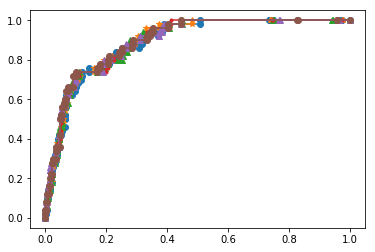

In [9]:
fpr = []
tpr = []

for item in [70, 80, 90, 100, 110, 120]:
    model = GradientBoostingClassifier(n_estimators = item)
    model.fit(X_train, y_train)
    y_new = model.predict_proba(X_test)[:, 1]   
    
    auc = metrics.roc_auc_score(y_test,y_new)
    print('n_estimators is %s' % item, ', auc is %s' % auc)
    
    fpr.append(metrics.roc_curve(y_test, y_new)[0])
    tpr.append(metrics.roc_curve(y_test, y_new)[1])

plt.plot(fpr[0], tpr[0], marker = 'o') 
plt.plot(fpr[1], tpr[1], marker = '*') 
plt.plot(fpr[2], tpr[2], marker = '^') 
plt.plot(fpr[3], tpr[3], marker = '.') 
plt.plot(fpr[4], tpr[4], marker = '^') 
plt.plot(fpr[5], tpr[5], marker = 'o') 
plt.show()

As n_estimators goes up, auc goes up, but auc grow slowly.

learning_rate is 0.01 , auc is 0.8748157560355782
learning_rate is 0.05 , auc is 0.89143583227446
learning_rate is 0.1 , auc is 0.8944345616264294
learning_rate is 0.15 , auc is 0.8970520965692503
learning_rate is 0.2 , auc is 0.8960101651842439
learning_rate is 0.25 , auc is 0.8933672172808133


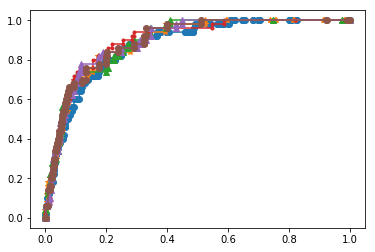

In [10]:
fpr = []
tpr = []

for item in [0.01, 0.05, 0.1, 0.15, 0.2, 0.25]:
    model = GradientBoostingClassifier(learning_rate = item)
    model.fit(X_train, y_train)
    y_new = model.predict_proba(X_test)[:, 1]   
    
    auc = metrics.roc_auc_score(y_test,y_new)
    print('learning_rate is %s' % item, ', auc is %s' % auc)
    
    fpr.append(metrics.roc_curve(y_test, y_new)[0])
    tpr.append(metrics.roc_curve(y_test, y_new)[1])

plt.plot(fpr[0], tpr[0], marker = 'o') 
plt.plot(fpr[1], tpr[1], marker = '*') 
plt.plot(fpr[2], tpr[2], marker = '^') 
plt.plot(fpr[3], tpr[3], marker = '.') 
plt.plot(fpr[4], tpr[4], marker = '^') 
plt.plot(fpr[5], tpr[5], marker = 'o') 
plt.show()

As learning_rate goes up, auc goes up and then down, when learning_rate grow too large,the model is overfit.

# Compare ensembles models

auc of GBDT is 0.8932401524777637
auc of RF is 0.851423125794155


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


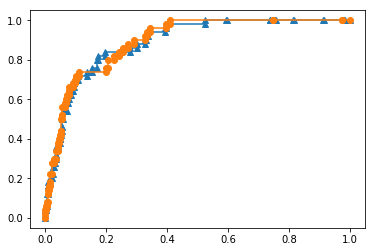

In [11]:
estimator1 = GradientBoostingClassifier()
estimator2 = RandomForestClassifier()


estimator1.fit(X_train, y_train)
estimator2.fit(X_train, y_train)

y_new1 = estimator1.predict_proba(X_test)[:, 1]
y_new2 = estimator2.predict_proba(X_test)[:, 1]

fpr1, tpr1, _ = metrics.roc_curve(y_test, y_new1)
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_new1)

auc1 = metrics.roc_auc_score(y_test, y_new1)
print('auc of GBDT is %s' % auc1)
auc2 = metrics.roc_auc_score(y_test, y_new2)
print('auc of RF is %s' % auc2)

plt.plot(fpr[1], tpr[1], marker = '^') 
plt.plot(fpr[2], tpr[2], marker = 'o') 
plt.show()

GBDT is more concerned with deviations, RF is more about variance, so GBDT can get better AUC
